<a id='Tableofcontents'></a>
# Table of Contents:
<li><a href='#imports'>Imports</a></li>
<li><a href='#q1'>Question 1</a></li>
<li><a href='#q2'>Question 2</a></li>
<li><a href='#q3'>Question 3</a></li>
<li><a href='#q4'>Question 4</a></li>
<li><a href='#q5'>Question 5</a></li>

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

<a id='imports'></a>
# Imports:
<li><a href='#Tableofcontents'>Table of Contents</a></li>

In [1]:
# Vectorization and tables
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from scipy import stats

# sklearn
import sklearn.preprocessing

# .py files
import wrangle

In [2]:
# Get zillow then split zillow
zillow = wrangle.wrangle_zillow()
train, validate, test = wrangle.split(zillow)

train.shape:(1069116, 14)
validate.shape:(458193, 14)
test.shape:(381828, 14)


In [3]:
# Verify shapes
train.shape, validate.shape, test.shape

((1069116, 14), (458193, 14), (381828, 14))

In [4]:

zillow.dtypes

bedroomcnt                                                  int64
bathroomcnt                                               float64
sqrft                                                     float64
assessedvalue                                             float64
yearbuilt                                                   int64
taxamount                                                 float64
county                                                     object
propertylandusedesc                                        object
state                                                      object
county_Los Angeles                                          int64
county_Orange                                               int64
county_Ventura                                              int64
propertylandusedesc_Inferred Single Family Residential      int64
propertylandusedesc_Single Family Residential               int64
dtype: object

<a id='q1'></a>
# Question 1
<li><a href='#Tableofcontents'>Table of Contents</a></li>

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [5]:
# Identify scaling columns
scale_cols = ['bedroomcnt',
              'bathroomcnt',
              'sqrft',
              'taxamount']

In [6]:
# Create dfs for scaling for train, validate, test
nonscale_train = train[scale_cols]
nonscale_validate = validate[scale_cols]
nonscale_test = test[scale_cols]

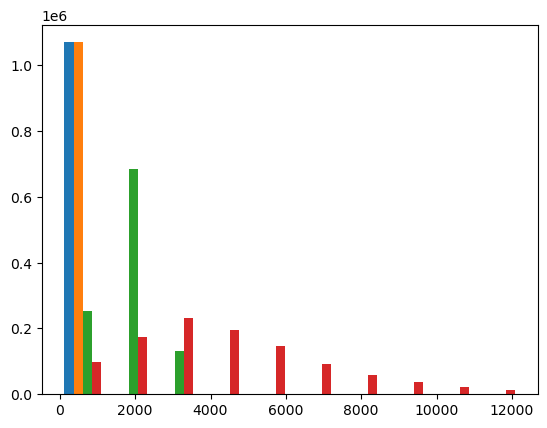

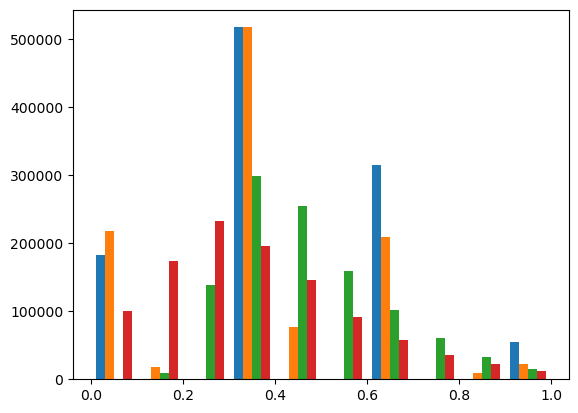

In [7]:
# Apply scaler to dfs (MinMaxScaler)
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(nonscale_train)
scaled_train = scaler.transform(nonscale_train)
scaled_validate = scaler.transform(nonscale_validate)
scaled_test = scaler.transform(nonscale_test)
plt.hist(nonscale_train)
plt.show()
plt.hist(scaled_train)
plt.show()

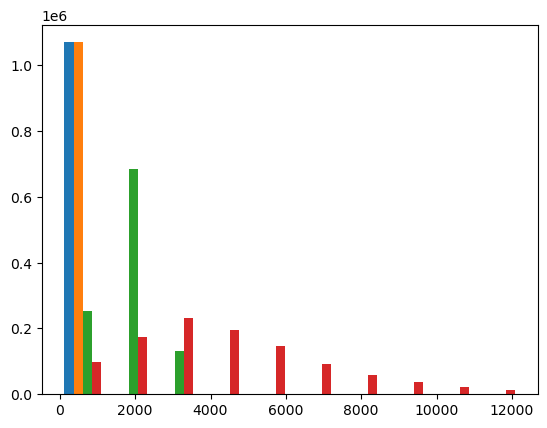

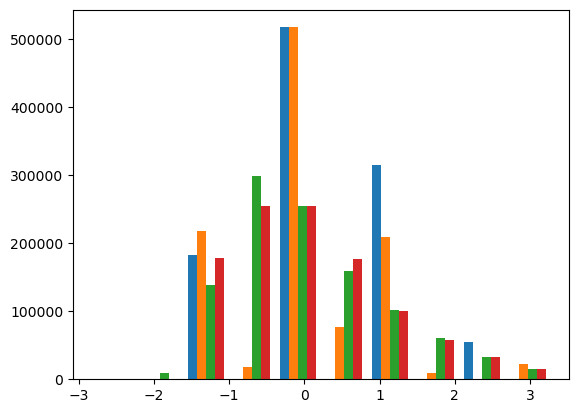

In [8]:
# Apply scaler to dfs (StandardScaler)
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(nonscale_train)
scaled_train = scaler.transform(nonscale_train)
scaled_validate = scaler.transform(nonscale_validate)
scaled_test = scaler.transform(nonscale_test)
plt.hist(nonscale_train)
plt.show()
plt.hist(scaled_train)
plt.show()

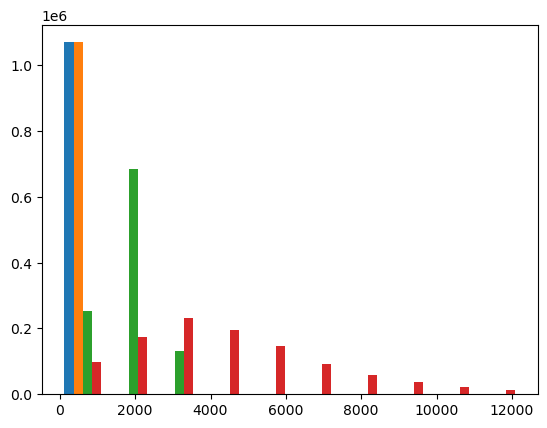

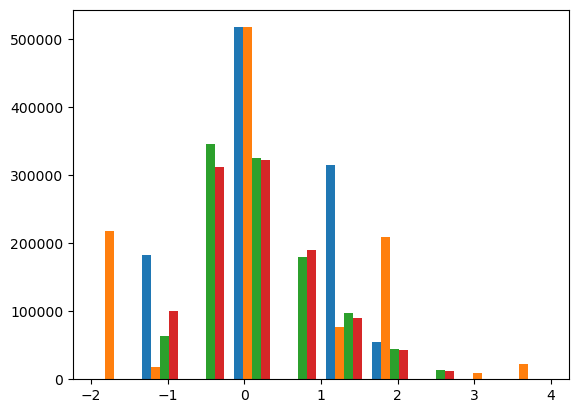

In [9]:
# Apply scaler to dfs (RobustScaler)
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(nonscale_train)
scaled_train = scaler.transform(nonscale_train)
scaled_validate = scaler.transform(nonscale_validate)
scaled_test = scaler.transform(nonscale_test)
plt.hist(nonscale_train)
plt.show()
plt.hist(scaled_train)
plt.show()

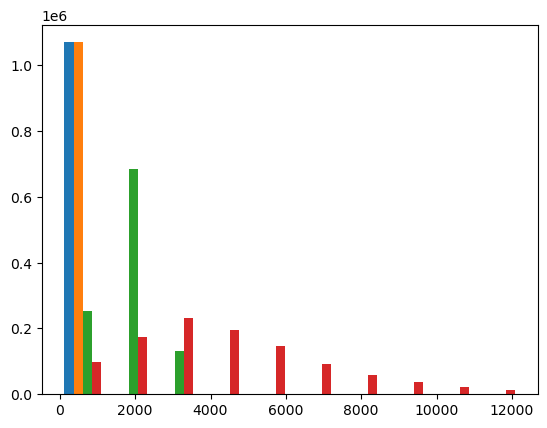

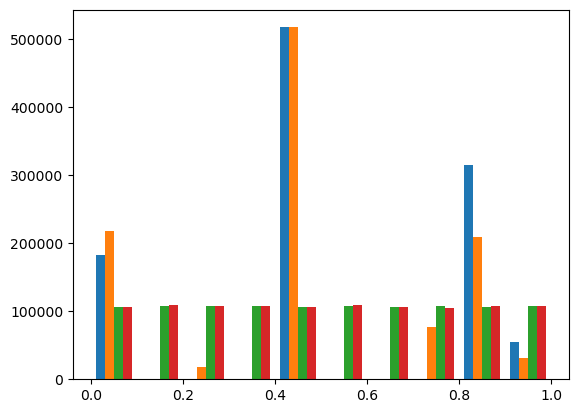

In [10]:
# Apply scaler to dfs (QuantileTransformer)
scaler = sklearn.preprocessing.QuantileTransformer()
scaler.fit(nonscale_train)
scaled_train = scaler.transform(nonscale_train)
scaled_validate = scaler.transform(nonscale_validate)
scaled_test = scaler.transform(nonscale_test)
plt.hist(nonscale_train)
plt.show()
plt.hist(scaled_train)
plt.show()

<a id='q2'></a>
# Question 2
<li><a href='#Tableofcontents'>Table of Contents</a></li>

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


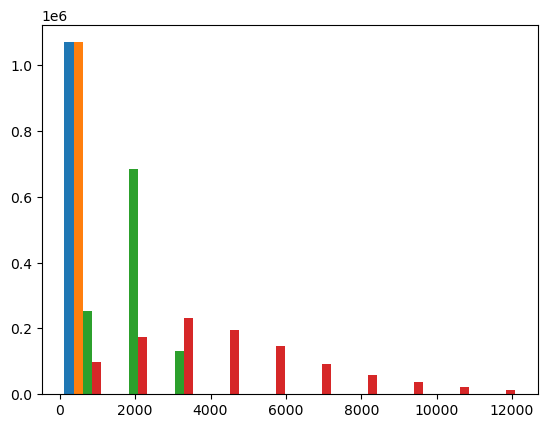

In [11]:
plt.hist(scaler.inverse_transform(scaled_train))
plt.show()

<a id='q3'></a>
# Question 3
<li><a href='#Tableofcontents'>Table of Contents</a></li>

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

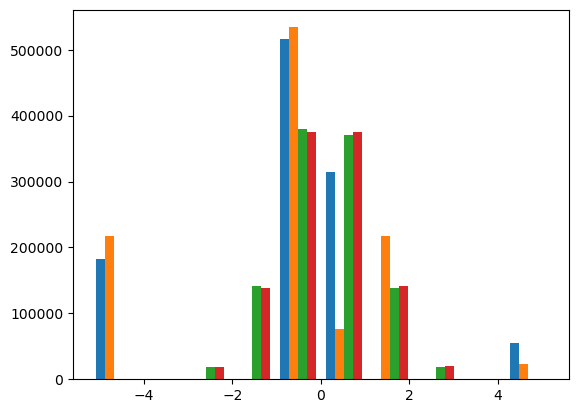

In [12]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
scaler.fit(nonscale_train)
plt.hist(scaler.transform(nonscale_train))
plt.show()

<a id='q4'></a>
# Question 4
<li><a href='#Tableofcontents'>Table of Contents</a></li>

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

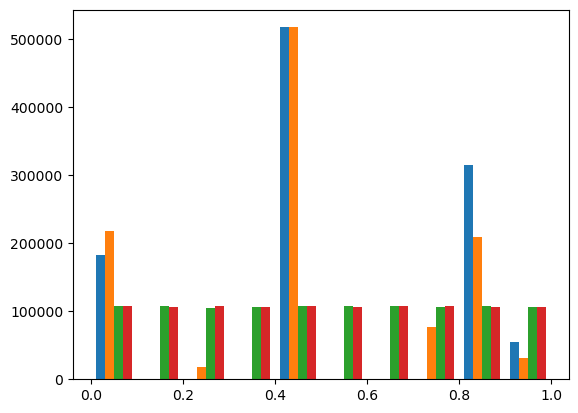

In [13]:
scaler = sklearn.preprocessing.QuantileTransformer()
scaler.fit(nonscale_train)
plt.hist(scaler.transform(nonscale_train))
plt.show()

DAS BARS ARE DIFFERENT JA

<a id='q5'></a>
# Question 5
<li><a href='#Tableofcontents'>Table of Contents</a></li>

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!